In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
data = pd.read_csv('data/digit-recognizer/train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [49]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

In [50]:
y_train.shape

(33600, 10)

In [51]:
def acc_evaluation(model,X,y):
    eva = model.evaluate(X,y)
    return np.round(eva[1]*100,2)

In [52]:
def loss_evaluation(model,X,y):
    eva = model.evaluate(X,y)
    return np.round(eva[0],5)

In [53]:
classifier = Sequential()

In [54]:
classifier.add(Dense(16,activation='relu'))
classifier.add(Dense(16,activation='relu'))
classifier.add(Dense(10,activation='sigmoid'))

# GRADIENT DESCENT

* w = w - learning_rate * g
* using SGD optimizer
* momentum = 0

In [55]:
sgd = tf.keras.optimizers.SGD()
classifier.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
eps = 100
model_sgd = classifier.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 3s 2ms/step - loss: 12.0760 - accuracy: 0.1100 - val_loss: 2.3017 - val_accuracy: 0.1094
Epoch 2/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1094
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1094
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3013 - val_accuracy: 0.1094
Epoch 6/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 7/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.109

Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 63/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy:

# GRADIENT DESCENT with MOMENTUM

* velocity = momentum * velocity - learning_rate * g
* w = w + velocity
* using SGD optimizer
* momentum > 0

In [57]:
classifier2 = Sequential()

classifier2.add(Dense(16,activation='relu'))
classifier2.add(Dense(16,activation='relu'))
classifier2.add(Dense(10,activation='sigmoid'))

In [58]:
sgdm = tf.keras.optimizers.SGD(momentum=0.9)
classifier2.compile(optimizer=sgdm,loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
eps = 100
model_sgdm = classifier2.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 161.9623 - accuracy: 0.1057 - val_loss: 2.3015 - val_accuracy: 0.1055
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3022 - accuracy: 0.1097 - val_loss: 2.3016 - val_accuracy: 0.1094
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3021 - accuracy: 0.1101 - val_loss: 2.3018 - val_accuracy: 0.1094
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3020 - accuracy: 0.1085 - val_loss: 2.3021 - val_accuracy: 0.1094
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3022 - accuracy: 0.1099 - val_loss: 2.3016 - val_accuracy: 0.1094
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1097 - val_loss: 2.3016 - val_accuracy: 0.1055
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3021 - accuracy: 0.1075 - val_loss: 2.3021 - val_accuracy: 0.10

# Nesterov Accelerated GD

* velocity = momentum * velocity - learning_rate * g
* w = w + momentum * velocity - learning_rate * g
* using SGD optimizer
* momentum > 0
* nesterov  = True

In [60]:
classifier3 = Sequential()

classifier3.add(Dense(16,activation='relu'))
classifier3.add(Dense(16,activation='relu'))
classifier3.add(Dense(10,activation='sigmoid'))

In [61]:
nag = tf.keras.optimizers.SGD(momentum=0.9,nesterov=True)
classifier3.compile(optimizer=nag,loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
eps = 100
model_nag = classifier3.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 9.5289 - accuracy: 0.1094 - val_loss: 2.3025 - val_accuracy: 0.1094
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 2.9694 - accuracy: 0.1082 - val_loss: 2.3020 - val_accuracy: 0.1094
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3022 - accuracy: 0.1103 - val_loss: 2.3019 - val_accuracy: 0.1055
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3022 - accuracy: 0.1091 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3021 - accuracy: 0.1095 - val_loss: 2.3024 - val_accuracy: 0.1094
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3021 - accuracy: 0.1102 - val_loss: 2.3016 - val_accuracy: 0.1094
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3022 - accuracy: 0.1098 - val_loss: 2.3017 - val_accuracy: 0.1094

# AdaGrad

In [63]:
classifier4 = Sequential()

classifier4.add(Dense(16,activation='relu'))
classifier4.add(Dense(16,activation='relu'))
classifier4.add(Dense(10,activation='sigmoid'))

In [64]:
adg = tf.keras.optimizers.Adagrad()
classifier4.compile(optimizer=adg,loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
eps = 100
model_adg = classifier4.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 3s 2ms/step - loss: 5.2307 - accuracy: 0.1511 - val_loss: 2.5840 - val_accuracy: 0.1533
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 2.4351 - accuracy: 0.1501 - val_loss: 2.3980 - val_accuracy: 0.1545
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3405 - accuracy: 0.1512 - val_loss: 2.3404 - val_accuracy: 0.1548
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3010 - accuracy: 0.1560 - val_loss: 2.3090 - val_accuracy: 0.1585
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 2.2757 - accuracy: 0.1603 - val_loss: 2.2860 - val_accuracy: 0.1631
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 2.2570 - accuracy: 0.1642 - val_loss: 2.2675 - val_accuracy: 0.1693
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 2.2388 - accuracy: 0.1724 - val_loss: 2.2491 - val_accuracy: 0.1756

Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5140 - accuracy: 0.4580 - val_loss: 1.5300 - val_accuracy: 0.4650
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5076 - accuracy: 0.4615 - val_loss: 1.5240 - val_accuracy: 0.4668
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5017 - accuracy: 0.4631 - val_loss: 1.5182 - val_accuracy: 0.4693
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 1.4958 - accuracy: 0.4648 - val_loss: 1.5126 - val_accuracy: 0.4711
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 1.4903 - accuracy: 0.4661 - val_loss: 1.5070 - val_accuracy: 0.4731
Epoch 63/100
840/840 [==============================] - 1s 2ms/step - loss: 1.4850 - accuracy: 0.4672 - val_loss: 1.5010 - val_accuracy: 0.4738
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 1.4799 - accuracy: 0.4688 - val_loss: 1.4955 - val_accuracy:

# AdaDelta

In [66]:
classifier5 = Sequential()

classifier5.add(Dense(16,activation='relu'))
classifier5.add(Dense(16,activation='relu'))
classifier5.add(Dense(10,activation='sigmoid'))

In [67]:
add = tf.keras.optimizers.Adadelta()
classifier5.compile(optimizer=add,loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
eps = 100
model_add = classifier5.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 63.0601 - accuracy: 0.1164 - val_loss: 56.0616 - val_accuracy: 0.1165
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 50.4107 - accuracy: 0.1159 - val_loss: 46.2524 - val_accuracy: 0.1195
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 42.4917 - accuracy: 0.1159 - val_loss: 39.7291 - val_accuracy: 0.1198
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 37.0623 - accuracy: 0.1203 - val_loss: 34.9963 - val_accuracy: 0.1238
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 32.9781 - accuracy: 0.1247 - val_loss: 31.3458 - val_accuracy: 0.1307
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 29.6660 - accuracy: 0.1284 - val_loss: 28.2551 - val_accuracy: 0.1371
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 26.7757 - accuracy: 0.1310 - val_loss: 25.4928 - val_ac

Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 2.5663 - accuracy: 0.1962 - val_loss: 2.5390 - val_accuracy: 0.1940
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 2.5530 - accuracy: 0.1959 - val_loss: 2.5267 - val_accuracy: 0.1936
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 2.5405 - accuracy: 0.1967 - val_loss: 2.5150 - val_accuracy: 0.1936
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 2.5284 - accuracy: 0.1971 - val_loss: 2.5037 - val_accuracy: 0.1939
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 2.5169 - accuracy: 0.1976 - val_loss: 2.4931 - val_accuracy: 0.1937
Epoch 63/100
840/840 [==============================] - 1s 2ms/step - loss: 2.5063 - accuracy: 0.1979 - val_loss: 2.4829 - val_accuracy: 0.1945
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 2.4959 - accuracy: 0.1984 - val_loss: 2.4733 - val_accuracy:

# ADAM

In [69]:
classifier6 = Sequential()

classifier6.add(Dense(16,activation='relu'))
classifier6.add(Dense(16,activation='relu'))
classifier6.add(Dense(10,activation='sigmoid'))

In [70]:
adam = tf.keras.optimizers.Adam()
classifier6.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [71]:
eps = 100
model_adam = classifier6.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 2.4751 - accuracy: 0.1840 - val_loss: 1.9915 - val_accuracy: 0.2717
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 1.6830 - accuracy: 0.3688 - val_loss: 1.4749 - val_accuracy: 0.4216
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 1.3663 - accuracy: 0.4513 - val_loss: 1.2821 - val_accuracy: 0.4762
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 1.2052 - accuracy: 0.5046 - val_loss: 1.1559 - val_accuracy: 0.5399
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 1.0990 - accuracy: 0.5613 - val_loss: 1.0730 - val_accuracy: 0.5830
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 1.0314 - accuracy: 0.5936 - val_loss: 1.0620 - val_accuracy: 0.5893
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 0.9656 - accuracy: 0.6192 - val_loss: 0.9749 - val_accuracy: 0.6354

Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.8423 - val_loss: 0.6159 - val_accuracy: 0.8298
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.8417 - val_loss: 0.6640 - val_accuracy: 0.8070
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 0.5443 - accuracy: 0.8410 - val_loss: 0.6686 - val_accuracy: 0.8113
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 0.5401 - accuracy: 0.8430 - val_loss: 0.5991 - val_accuracy: 0.8327
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 0.5324 - accuracy: 0.8461 - val_loss: 0.5750 - val_accuracy: 0.8385
Epoch 63/100
840/840 [==============================] - 1s 2ms/step - loss: 0.5353 - accuracy: 0.8449 - val_loss: 0.6404 - val_accuracy: 0.8131
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.8419 - val_loss: 0.5800 - val_accuracy:

# RMSprop

In [72]:
classifier7 = Sequential()

classifier7.add(Dense(16,activation='relu'))
classifier7.add(Dense(16,activation='relu'))
classifier7.add(Dense(10,activation='sigmoid'))

In [73]:
rprop = tf.keras.optimizers.RMSprop()
classifier7.compile(optimizer=rprop,loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
eps = 100
model_rmsp = classifier7.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 2.2797 - accuracy: 0.3034 - val_loss: 1.6686 - val_accuracy: 0.3781
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 1.6290 - accuracy: 0.3859 - val_loss: 1.5343 - val_accuracy: 0.4031
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5501 - accuracy: 0.4005 - val_loss: 1.5030 - val_accuracy: 0.4171
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5069 - accuracy: 0.4115 - val_loss: 1.5641 - val_accuracy: 0.4305
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 1.4979 - accuracy: 0.4192 - val_loss: 1.4632 - val_accuracy: 0.4257
Epoch 6/100
840/840 [==============================] - 2s 2ms/step - loss: 1.4738 - accuracy: 0.4205 - val_loss: 1.4300 - val_accuracy: 0.4183
Epoch 7/100
840/840 [==============================] - 2s 2ms/step - loss: 1.4714 - accuracy: 0.4222 - val_loss: 1.5089 - val_accuracy: 0.4336

Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 1.4362 - accuracy: 0.4429 - val_loss: 2.1501 - val_accuracy: 0.4588
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 1.4534 - accuracy: 0.4435 - val_loss: 1.8358 - val_accuracy: 0.4301
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 1.4538 - accuracy: 0.4388 - val_loss: 1.7298 - val_accuracy: 0.4315
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 1.4420 - accuracy: 0.4393 - val_loss: 1.8763 - val_accuracy: 0.4470
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 1.4234 - accuracy: 0.4461 - val_loss: 1.7993 - val_accuracy: 0.4384
Epoch 63/100
840/840 [==============================] - 1s 2ms/step - loss: 1.4572 - accuracy: 0.4422 - val_loss: 1.7594 - val_accuracy: 0.4290
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 1.4428 - accuracy: 0.4440 - val_loss: 1.8670 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

Text(0, 0.5, 'Accuracy')

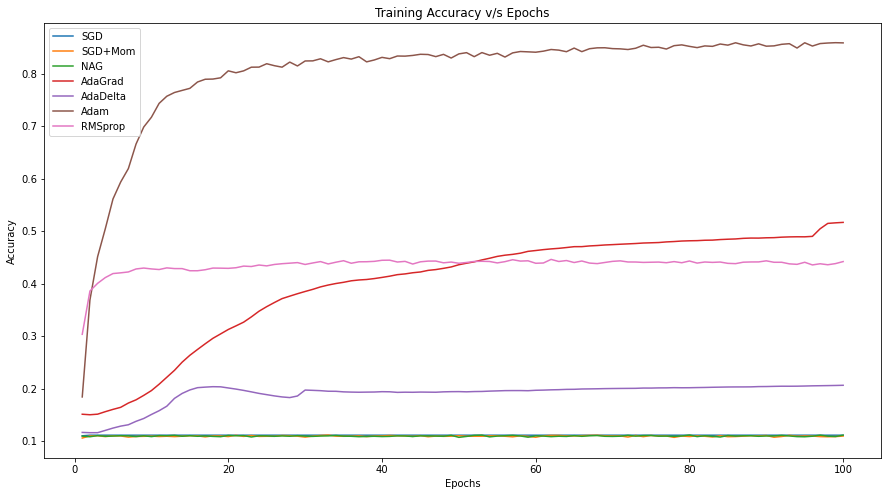

In [75]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_accuracy1 = model_sgd.history['accuracy']
train_accuracy2 = model_sgdm.history['accuracy']
train_accuracy3 = model_nag.history['accuracy']
train_accuracy4 = model_adg.history['accuracy']
train_accuracy5 = model_add.history['accuracy']
train_accuracy6 = model_adam.history['accuracy']
train_accuracy7 = model_rmsp.history['accuracy']
sns.lineplot(epochs, train_accuracy1, label ='SGD',linewidth=1.5)
sns.lineplot(epochs, train_accuracy2, label ='SGD+Mom',linewidth=1.5)
sns.lineplot(epochs, train_accuracy3, label ='NAG',linewidth=1.5)
sns.lineplot(epochs, train_accuracy4, label ='AdaGrad',linewidth=1.5)
sns.lineplot(epochs, train_accuracy5, label ='AdaDelta',linewidth=1.5)
sns.lineplot(epochs, train_accuracy6, label ='Adam',linewidth=1.5)
sns.lineplot(epochs, train_accuracy7, label ='RMSprop',linewidth=1.5)
plt.title('Training Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [76]:
models = [classifier,classifier2,classifier3,classifier4,classifier5,classifier6,classifier7]
acc_scores = []
for model in models:
    sc = acc_evaluation(model,X_test,y_test)
    acc_scores.append(sc)

263/263 [==============================] - 1s 2ms/step - loss: 2.9603 - accuracy: 0.4194


In [77]:
names = ['SGD','SGD+mom','NAG','AdaGrad','AdaDelta','Adam','RMSprop']

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '11.45'),
 Text(0, 0, '10.39'),
 Text(0, 0, '10.29'),
 Text(0, 0, '51.68'),
 Text(0, 0, '20.38'),
 Text(0, 0, '83.75'),
 Text(0, 0, '41.94')]

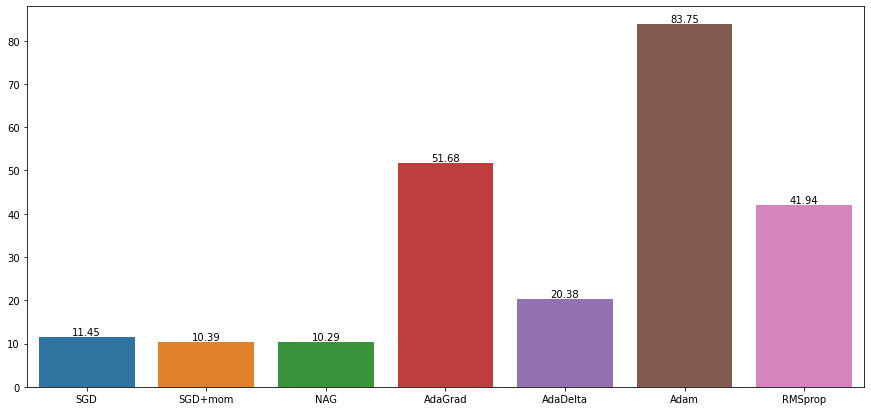

In [79]:
plt.figure(figsize=(15,7))
ax = sns.barplot(names,acc_scores)
ax.bar_label(ax.containers[0])